# Assignment 4.10 Coding Etiquette & Excel Reporting Part 1 (5-10)

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create path to Insctacart Analysis folder

path = r'/Users/mitchellkubik/Desktop/08-2023 Instacart Basket Analysis'

In [3]:
# Import new data subset with normal activity customers.
df_normal = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4.10 Coding Etiquette & Excel Reporting','df_normal.pkl'))

**5. Create a profiling variable based on age, income, department_id column, and number of dependents. Think of a way to also use the 'order_hour_of_day' and 'orders_day_of_week' column if possible.**

**6. Create appropriate visualizations to show the distribution of profiles.**

In [4]:
# Descriptive Statistics

df_normal['age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

- Minimum age = 18 years
- 25% = 33 years
- 50% = 49 years
- 75% = 65 years

- Age groups will be divided into 4 groups: 18-32, 33-48, 49-64, and 65+

In [5]:
# Divide customers into age groups

df_normal.loc[(df_normal['age'] >= 18) & (df_normal['age'] <= 32), 'age_group'] = 'Age 18-32 Years'

In [6]:
df_normal.loc[(df_normal['age'] >= 33) & (df_normal['age'] <= 48), 'age_group'] = 'Age 33-48 Years'

In [7]:
df_normal.loc[(df_normal['age'] >= 49) & (df_normal['age'] <= 64), 'age_group'] = 'Age 49-64 Years'

In [8]:
df_normal.loc[(df_normal['age'] >= 65), 'age_group'] = 'Age 65+ Years'

In [9]:
# Check output

df_normal['age_group'].value_counts(dropna = False)

Age 65+ Years      8195544
Age 33-48 Years    7755276
Age 49-64 Years    7728610
Age 18-32 Years    7285134
Name: age_group, dtype: int64

In [10]:
# Descriptive Statistics

df_normal['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

- I'm choosing to divide income into 3 groups: low, medium, and high.

In [11]:
df_normal.loc[(df_normal['income'] >=25000) & (df_normal['income'] <=66999), 'income_group'] = 'Low Income'

In [12]:
df_normal.loc[(df_normal['income'] >=67000) & (df_normal['income'] <=127999), 'income_group'] = 'Medium Income'

In [13]:
df_normal.loc[(df_normal['income'] >=128000), 'income_group'] = 'High Income'

In [14]:
# Check output

df_normal['income_group'].value_counts(dropna = False)

Medium Income    15549969
High Income       7753117
Low Income        7661478
Name: income_group, dtype: int64

In [15]:
# Create crosstab of the two columns

age_income_crosstab = pd.crosstab(df_normal['income_group'], df_normal['age_group'], dropna = False)

In [16]:
age_income_crosstab

age_group,Age 18-32 Years,Age 33-48 Years,Age 49-64 Years,Age 65+ Years
income_group,,,,
High Income,82080,1557330,2971584,3142123
Low Income,3343032,2254469,1017414,1046563
Medium Income,3860022,3943477,3739612,4006858


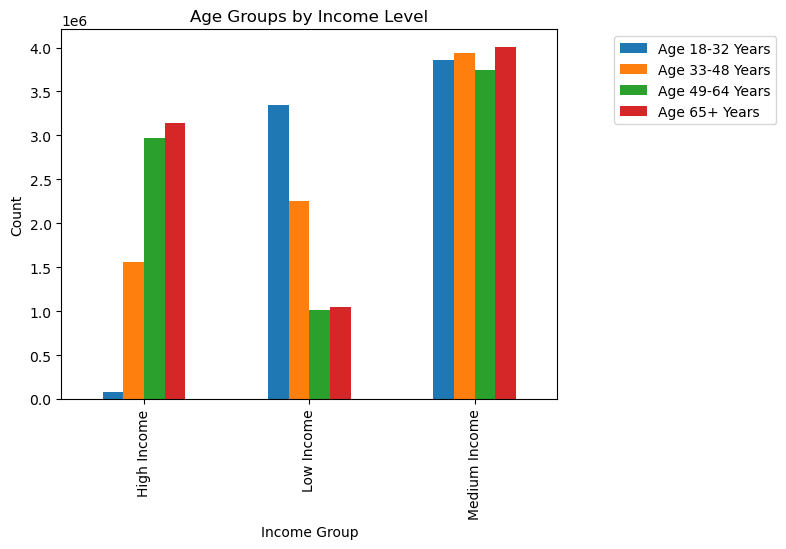

In [17]:
# Create visualization of crosstab

age_income_bar = age_income_crosstab.plot.bar()
plt.xlabel("Income Group")
plt.ylabel("Count")
plt.title("Age Groups by Income Level")
plt.legend(bbox_to_anchor=(1.1, 1))

In [18]:
# Export bar chart

age_income_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_income_bar.png'))

In [19]:
# Import Departments Wrangled DF

df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', '4.4 Data Wrangling & Subsetting', 'departments_wrangled.csv'), index_col = False)

In [20]:
df_dep

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [21]:
# Rename unnamed column

df_dep.rename(columns = {'Unnamed: 0': 'department_id'}, inplace = True)

In [22]:
# Check the output

df_dep

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [23]:
pd.set_option('display.max_columns',(None))

In [24]:
df_normal

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,avg_days_between_orders,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,region,activity_flag,age_group,income_group
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,mid range product,regularly busy,regularly busy,average orders,10,New customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal customer,Age 18-32 Years,Low Income
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,mid range product,regularly busy,slowest days,average orders,10,New customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal customer,Age 18-32 Years,Low Income
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,mid range product,regularly busy,slowest days,most orders,10,New customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal customer,Age 18-32 Years,Low Income
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,mid range product,least busy,slowest days,average orders,10,New customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal customer,Age 18-32 Years,Low Income
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,mid range product,least busy,slowest days,most orders,10,New customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal customer,Age 18-32 Years,Low Income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404850,3308056,106143,22,4,20,10.0,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,mid range product,least busy,slowest days,average orders,26,Regular customer,10.700000,High Spender,7.0,Frequent Customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,normal customer,Age 18-32 Years,Low Income
32404851,2988973,106143,23,2,22,5.0,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,mid range product,regularly busy,regularly busy,average orders,26,Regular customer,10.700000,High Spender,7.0,Frequent Customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,normal customer,Age 18-32 Years,Low Income
32404852,930,106143,24,6,12,4.0,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,mid range product,regularly busy,regularly busy,most orders,26,Regular customer,10.700000,High Spender,7.0,Frequent Customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,normal customer,Age 18-32 Years,Low Income
32404853,467253,106143,25,6,16,7.0,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,mid range product,regularly busy,regularly busy,most orders,26,Regular customer,10.700000,High Spender,7.0,Frequent Customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,normal customer,Age 18-32 Years,Low Income


In [25]:
# Merge department column on df_normal

df_normal = df_normal.merge(df_dep, on = 'department_id')

In [26]:
df_normal.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,avg_days_between_orders,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,region,activity_flag,age_group,income_group,department
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,mid range product,regularly busy,regularly busy,average orders,10,New customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal customer,Age 18-32 Years,Low Income,beverages
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,mid range product,regularly busy,slowest days,average orders,10,New customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal customer,Age 18-32 Years,Low Income,beverages
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,mid range product,regularly busy,slowest days,most orders,10,New customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal customer,Age 18-32 Years,Low Income,beverages
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,mid range product,least busy,slowest days,average orders,10,New customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal customer,Age 18-32 Years,Low Income,beverages
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,mid range product,least busy,slowest days,most orders,10,New customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal customer,Age 18-32 Years,Low Income,beverages


In [27]:
# Reindex df for own personal sanity

df_normal = df_normal.reindex(columns = ['order_id', 'user_id', 'order_number', 'product_id', 'product_name','department_id', 'department', 'aisle_id', 'prices', 'price_range_loc', 'avg_price', 'orders_day_of_week', 'order_hour_of_day', 'add_to_cart_order', 'days_since_prior_order', 'reordered', 'max_order', 'avg_days_between_orders', 'age', 'age_group', 'state', 'region', 'gender', 'income', 'income_group', 'fam_status', 'n_dependants', 'loyalty_flag', 'spending_flag', 'frequency_flag', 'activity_flag', 'date_joined', 'busiest_day', 'busiest_days', 'busiest_period_of_days'])

In [28]:
# Check output

df_normal.head()

,order_id,user_id,order_number,product_id,product_name,department_id,department,aisle_id,prices,price_range_loc,avg_price,orders_day_of_week,order_hour_of_day,add_to_cart_order,days_since_prior_order,reordered,max_order,avg_days_between_orders,age,age_group,state,region,gender,income,income_group,fam_status,n_dependants,loyalty_flag,spending_flag,frequency_flag,activity_flag,date_joined,busiest_day,busiest_days,busiest_period_of_days
0,2539329,1,1,196,Soda,7,beverages,77,9.0,mid range product,6.367797,2,8,1,NaN,0,10,20.5,31,Age 18-32 Years,Alabama,South,Female,40423,Low Income,married,3,New customer,Low Spender,Non-Frequent Customer,normal customer,2/17/2019,regularly busy,regularly busy,NaN
1,2398795,1,2,196,Soda,7,beverages,77,9.0,mid range product,6.367797,3,7,1,15.0,1,10,20.5,31,Age 18-32 Years,Alabama,South,Female,40423,Low Income,married,3,New customer,Low Spender,Non-Frequent Customer,normal customer,2/17/2019,regularly busy,slowest days,NaN
2,473747,1,3,196,Soda,7,beverages,77,9.0,mid range product,6.367797,3,12,1,21.0,1,10,20.5,31,Age 18-32 Years,Alabama,South,Female,40423,Low Income,married,3,New customer,Low Spender,Non-Frequent Customer,normal customer,2/17/2019,regularly busy,slowest days,NaN
3,2254736,1,4,196,Soda,7,beverages,77,9.0,mid range product,6.367797,4,7,1,29.0,1,10,20.5,31,Age 18-32 Years,Alabama,South,Female,40423,Low Income,married,3,New customer,Low Spender,Non-Frequent Customer,normal customer,2/17/2019,least busy,slowest days,NaN
4,431534,1,5,196,Soda,7,beverages,77,9.0,mid range product,6.367797,4,15,1,28.0,1,10,20.5,31,Age 18-32 Years,Alabama,South,Female,40423,Low Income,married,3,New customer,Low Spender,Non-Frequent Customer,normal customer,2/17/2019,least busy,slowest days,NaN


In [29]:
# Rename columns

df_normal.rename(columns = {'prices' : 'price', 'orders_day_of_week' : 'order_day_of_week', 'n_dependants' : 'n_dependents'}, inplace = True)

In [30]:
# Check output

df_normal.head()

,order_id,user_id,order_number,product_id,product_name,department_id,department,aisle_id,price,price_range_loc,avg_price,order_day_of_week,order_hour_of_day,add_to_cart_order,days_since_prior_order,reordered,max_order,avg_days_between_orders,age,age_group,state,region,gender,income,income_group,fam_status,n_dependents,loyalty_flag,spending_flag,frequency_flag,activity_flag,date_joined,busiest_day,busiest_days,busiest_period_of_days
0,2539329,1,1,196,Soda,7,beverages,77,9.0,mid range product,6.367797,2,8,1,NaN,0,10,20.5,31,Age 18-32 Years,Alabama,South,Female,40423,Low Income,married,3,New customer,Low Spender,Non-Frequent Customer,normal customer,2/17/2019,regularly busy,regularly busy,NaN
1,2398795,1,2,196,Soda,7,beverages,77,9.0,mid range product,6.367797,3,7,1,15.0,1,10,20.5,31,Age 18-32 Years,Alabama,South,Female,40423,Low Income,married,3,New customer,Low Spender,Non-Frequent Customer,normal customer,2/17/2019,regularly busy,slowest days,NaN
2,473747,1,3,196,Soda,7,beverages,77,9.0,mid range product,6.367797,3,12,1,21.0,1,10,20.5,31,Age 18-32 Years,Alabama,South,Female,40423,Low Income,married,3,New customer,Low Spender,Non-Frequent Customer,normal customer,2/17/2019,regularly busy,slowest days,NaN
3,2254736,1,4,196,Soda,7,beverages,77,9.0,mid range product,6.367797,4,7,1,29.0,1,10,20.5,31,Age 18-32 Years,Alabama,South,Female,40423,Low Income,married,3,New customer,Low Spender,Non-Frequent Customer,normal customer,2/17/2019,least busy,slowest days,NaN
4,431534,1,5,196,Soda,7,beverages,77,9.0,mid range product,6.367797,4,15,1,28.0,1,10,20.5,31,Age 18-32 Years,Alabama,South,Female,40423,Low Income,married,3,New customer,Low Spender,Non-Frequent Customer,normal customer,2/17/2019,least busy,slowest days,NaN


In [31]:
# Create crosstab between marital status and department 

fam_stat_spending_crosstab = pd.crosstab(df_normal['fam_status'], df_normal['spending_flag'], dropna = False)

In [32]:
fam_stat_spending_crosstab

spending_flag,High Spender,Low Spender
fam_status,,
divorced/widowed,50321,2594950
living with parents and siblings,27926,1453246
married,429457,21314254
single,95721,4998689


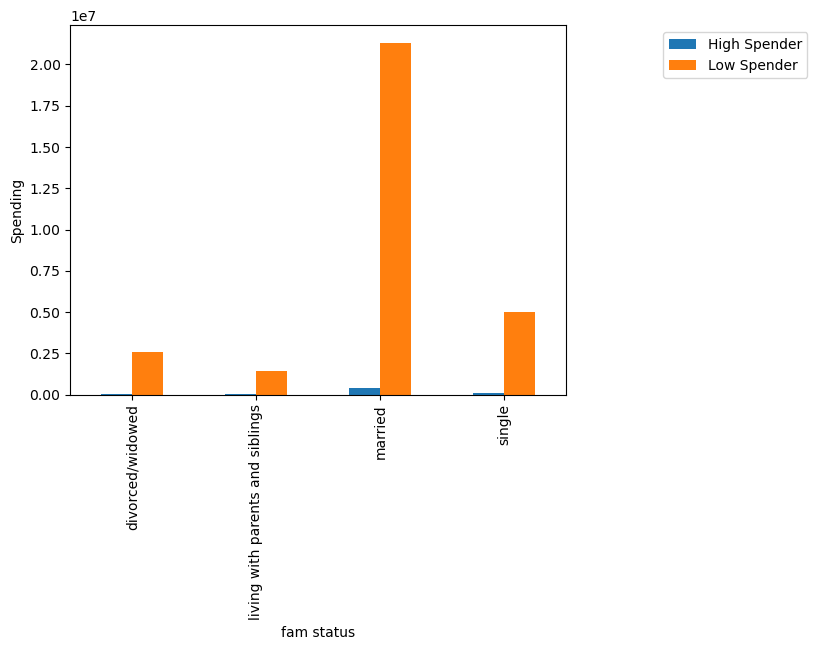

In [33]:
# Create bar chart for crosstab

fam_dept_bar = fam_stat_spending_crosstab.plot.bar()
plt.xlabel("fam status")
plt.ylabel("Spending")
plt.legend(bbox_to_anchor=(1.5, 1))

In [34]:
# Export family status spending bar graph

fam_dept_bar .figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','fam_dept_bar.png'))

In [35]:
# Export revised dataframe

df_normal.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4.10 Coding Etiquette & Excel Reporting', 'df_final.pkl'))